<a href="https://colab.research.google.com/github/MeenTers/VDAS_Project/blob/main/compare_views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from torch import nn, load, utils
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms, models
from torchvision.models.vgg import model_urls
from os import path, listdir
model_urls['vgg19'] = model_urls['vgg19'].replace('https://', 'http://')

In [3]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
import pandas as pd

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

# VGG model

In [5]:
class VGG:
	def __init__(self):
		model = models.vgg19(pretrained=True, progress=True)
		model.classifier = nn.Sequential(*list(model.classifier.children())[:3])
		self.model = model.cuda().eval()

	def __call__(self, x):
		return self.model(x)

In [6]:
vgg = VGG()

Downloading: "http://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

# Create Features Extraction Function

In [7]:
def get_features(model, loader):
    features = []
    with torch.no_grad():
        for batch, _ in tqdm(loader):
            if torch.cuda.is_available():
                batch = batch.cuda()
            b_features = model(batch).detach().cpu().numpy()
            for f in b_features:
                features.append(f)

    return features

## Create Loading the data Function

In [8]:
def get_dataset(images_path):
  transform = transforms.Compose([
    transforms.Resize(size=32),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
  ])

  dataset = datasets.ImageFolder(images_path, transform=transform)
  loader = utils.data.DataLoader(dataset, batch_size=100, shuffle=False, num_workers=1, pin_memory=True)
  return dataset, loader

## Install Font TH-SARABUN

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

## Create Compute Distance Function

In [11]:
def get_euclidean(base_car,diff_view):
    A = []
    for i in range(len(diff_view)):
        x = distance.euclidean(base_car[i],diff_view[i])
        A.append(x)
    return(A)

# compare little dmg in left of front car

In [12]:
car1_dataset , car1_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/Base/Front')
dmg1_dataset , dmg1_loader = get_dataset(r'/content/drive/MyDrive/Test Dist/dmg/front/little dmg')

In [13]:
id1b = get_features(vgg,car1_loader)
id1v = get_features(vgg,dmg1_loader)

100%|██████████| 1/1 [00:01<00:00,  1.46s/it]


In [14]:
id1 = get_euclidean(id1b,id1v)
id1

[11.211236953735352, 5.567543029785156, 0.0]

In [15]:
id1f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID1F.png')
id1dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg/test1/ID1dmg1.png')
id2f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID2F.png')
id2dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg/test1/ID2dmg1.png')

Text(150, 450, 'Distance = 5.568')

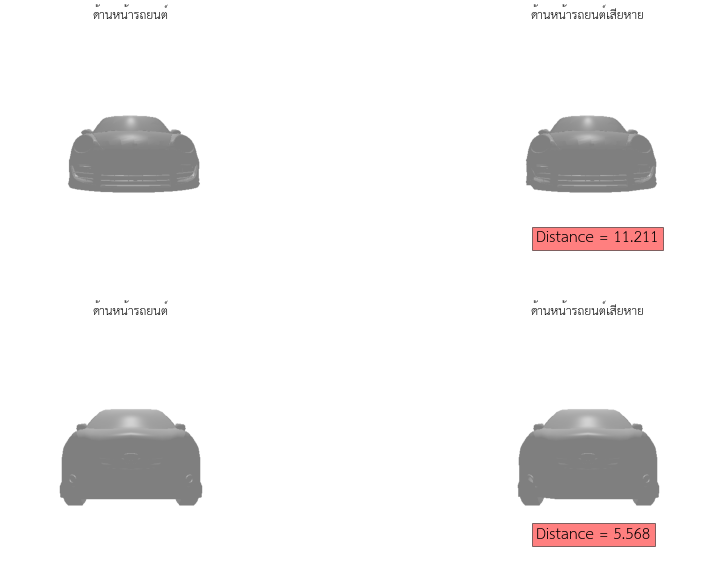

In [22]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id1f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id1dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id1[0],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id2f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id2dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(150,450,'Distance = '+str(round(id1[1],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))

In [ ]:
id3f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID3F.png')
id3dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg/test1/ID3dmg1.png')
id4f = cv2.imread('/content/drive/MyDrive/Test Dist/Base/Front/base of front/ID4F.png')
id4dmgf = cv2.imread('/content/drive/MyDrive/Test Dist/dmg/front/little dmg/test1/ID4dmg1.png')

Text(300, 850, 'Distance = 42.837')

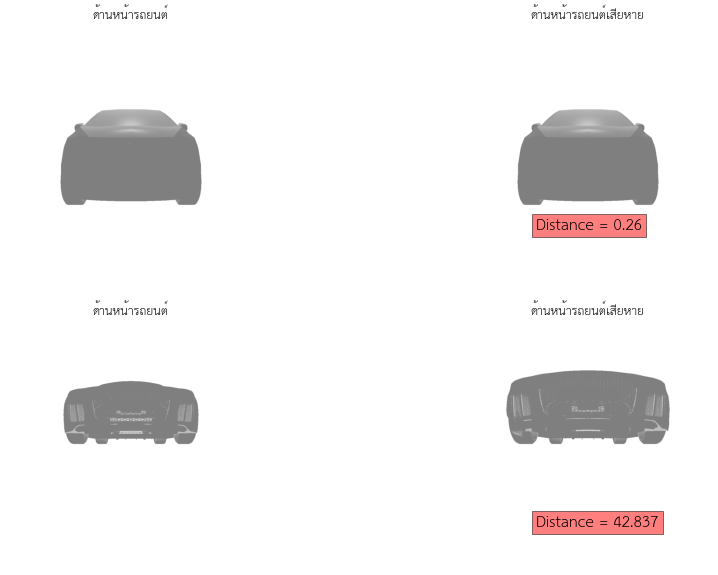

In [ ]:
# create figure
fig = plt.figure(figsize=(15, 10))
  # setting values to rows and column variables
rows = 2
columns = 2
  # Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  # showing image
plt.imshow(id3f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)  
# showing image
plt.imshow(id3dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(300,850,'Distance = '+str(round(id1[2],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))
        
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  # showing image
plt.imshow(id4f)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์')

  # Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  # showing image
plt.imshow(id4dmgf)
plt.axis('off')
plt.title('ด้านหน้ารถยนต์เสียหาย')
plt.text(300,850,'Distance = '+str(round(id1[3],3)),fontsize = 15,bbox = dict(facecolor = 'red', alpha = 0.5))